In [1]:
# importing libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read dataset

df = pd.read_csv('/content/worldometer_coronavirus_summary_data.csv')

In [4]:
df.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,176983,7651.0,159744.0,9588.0,1124.0,4378,189.0,909906.0,22511.0,40421365
1,Albania,Europe,272885,3487.0,268764.0,634.0,13.0,95001,1214.0,1762808.0,613697.0,2872441
2,Algeria,Africa,265511,6870.0,178137.0,80504.0,8.0,5874,152.0,230861.0,5108.0,45199871
3,Andorra,Europe,39234,153.0,38377.0,704.0,14.0,506402,1975.0,249838.0,3224715.0,77476
4,Angola,Africa,99003,1900.0,96951.0,152.0,NaN,2861,55.0,1473371.0,42575.0,34606502


##Data exploration

In [5]:
df.shape

#there are 225 rows and 12 columns

(225, 12)

In [6]:
df.isnull().sum()

##null values present


country                            0
continent                          0
total_confirmed                    0
total_deaths                       9
total_recovered                   14
active_cases                      13
serious_or_critical               63
total_cases_per_1m_population      0
total_deaths_per_1m_population     9
total_tests                       14
total_tests_per_1m_population     14
population                         0
dtype: int64

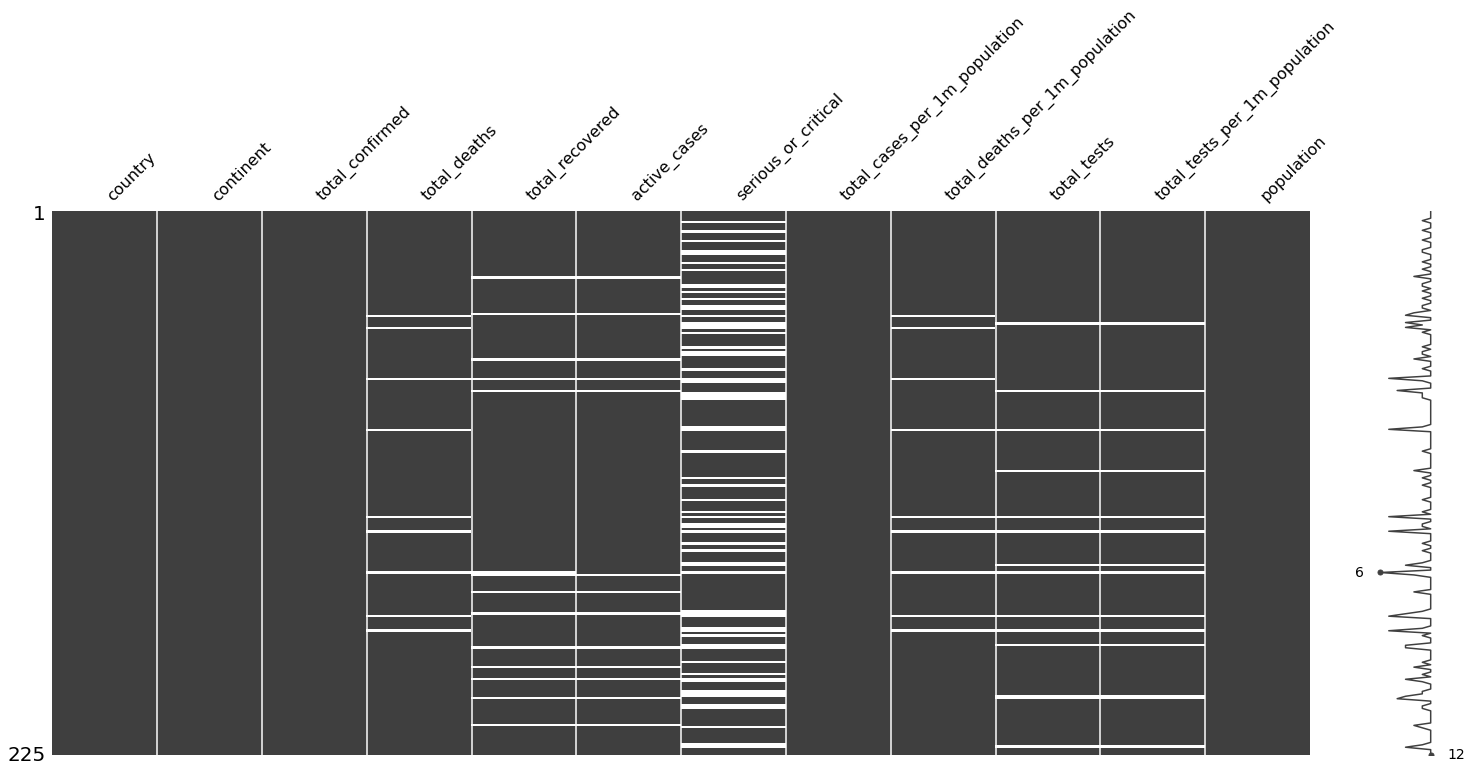

In [7]:
##treating null values
import missingno

missingno.matrix(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         225 non-null    object 
 1   continent                       225 non-null    object 
 2   total_confirmed                 225 non-null    int64  
 3   total_deaths                    216 non-null    float64
 4   total_recovered                 211 non-null    float64
 5   active_cases                    212 non-null    float64
 6   serious_or_critical             162 non-null    float64
 7   total_cases_per_1m_population   225 non-null    int64  
 8   total_deaths_per_1m_population  216 non-null    float64
 9   total_tests                     211 non-null    float64
 10  total_tests_per_1m_population   211 non-null    float64
 11  population                      225 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

In [9]:
df.describe()

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
count,2.250000e+02,216.000000,2.110000e+02,2.120000e+02,162.000000,225.000000,216.000000,2.110000e+02,2.110000e+02,2.250000e+02
mean,2.073944e+06,28189.046296,1.852811e+06,2.333117e+05,390.166667,129573.760000,1122.476852,2.836301e+07,1.804984e+06,3.505774e+07
std,7.096875e+06,97721.189288,5.938803e+06,1.658643e+06,1166.539216,137837.381455,1186.219725,1.025566e+08,3.145036e+06,1.392077e+08
min,1.000000e+00,1.000000,1.000000e+00,0.000000e+00,1.000000,9.000000,2.000000,4.467000e+03,5.108000e+03,8.040000e+02
25%,2.278900e+04,254.500000,1.549000e+04,4.045000e+02,6.250000,10732.000000,173.250000,3.467785e+05,1.493745e+05,5.662770e+05
50%,1.607750e+05,2250.500000,1.306880e+05,5.245000e+03,29.500000,85604.000000,736.000000,2.026898e+06,7.081020e+05,5.826966e+06
75%,9.968620e+05,13729.500000,9.353185e+05,6.061575e+04,212.250000,215342.000000,1799.250000,1.190922e+07,1.921081e+06,2.187913e+07
max,8.135088e+07,996072.000000,5.682258e+07,2.353223e+07,8944.000000,696171.000000,6272.000000,9.697011e+08,2.169905e+07,1.439324e+09


In [10]:
df.nunique()

country                           225
continent                           6
total_confirmed                   224
total_deaths                      205
total_recovered                   210
active_cases                      198
serious_or_critical               100
total_cases_per_1m_population     224
total_deaths_per_1m_population    201
total_tests                       211
total_tests_per_1m_population     211
population                        225
dtype: int64

In [11]:
df.columns

Index(['country', 'continent', 'total_confirmed', 'total_deaths',
       'total_recovered', 'active_cases', 'serious_or_critical',
       'total_cases_per_1m_population', 'total_deaths_per_1m_population',
       'total_tests', 'total_tests_per_1m_population', 'population'],
      dtype='object')

In [12]:
# total number of confirmed cases
df['total_confirmed'].sum(axis=0)

466637291

In [13]:
#the total number of active cases
df['active_cases'].sum(axis=0)

49462080.0

In [14]:
##total number of deaths
df['total_deaths'].sum(axis=0)

6088834.0

In [15]:
##total number of recovered
df['total_recovered'].sum(axis=0)

390943167.0

In [16]:
# total number of critical cases
df['serious_or_critical'].sum(axis=0)

63207.0

##Data Visualization

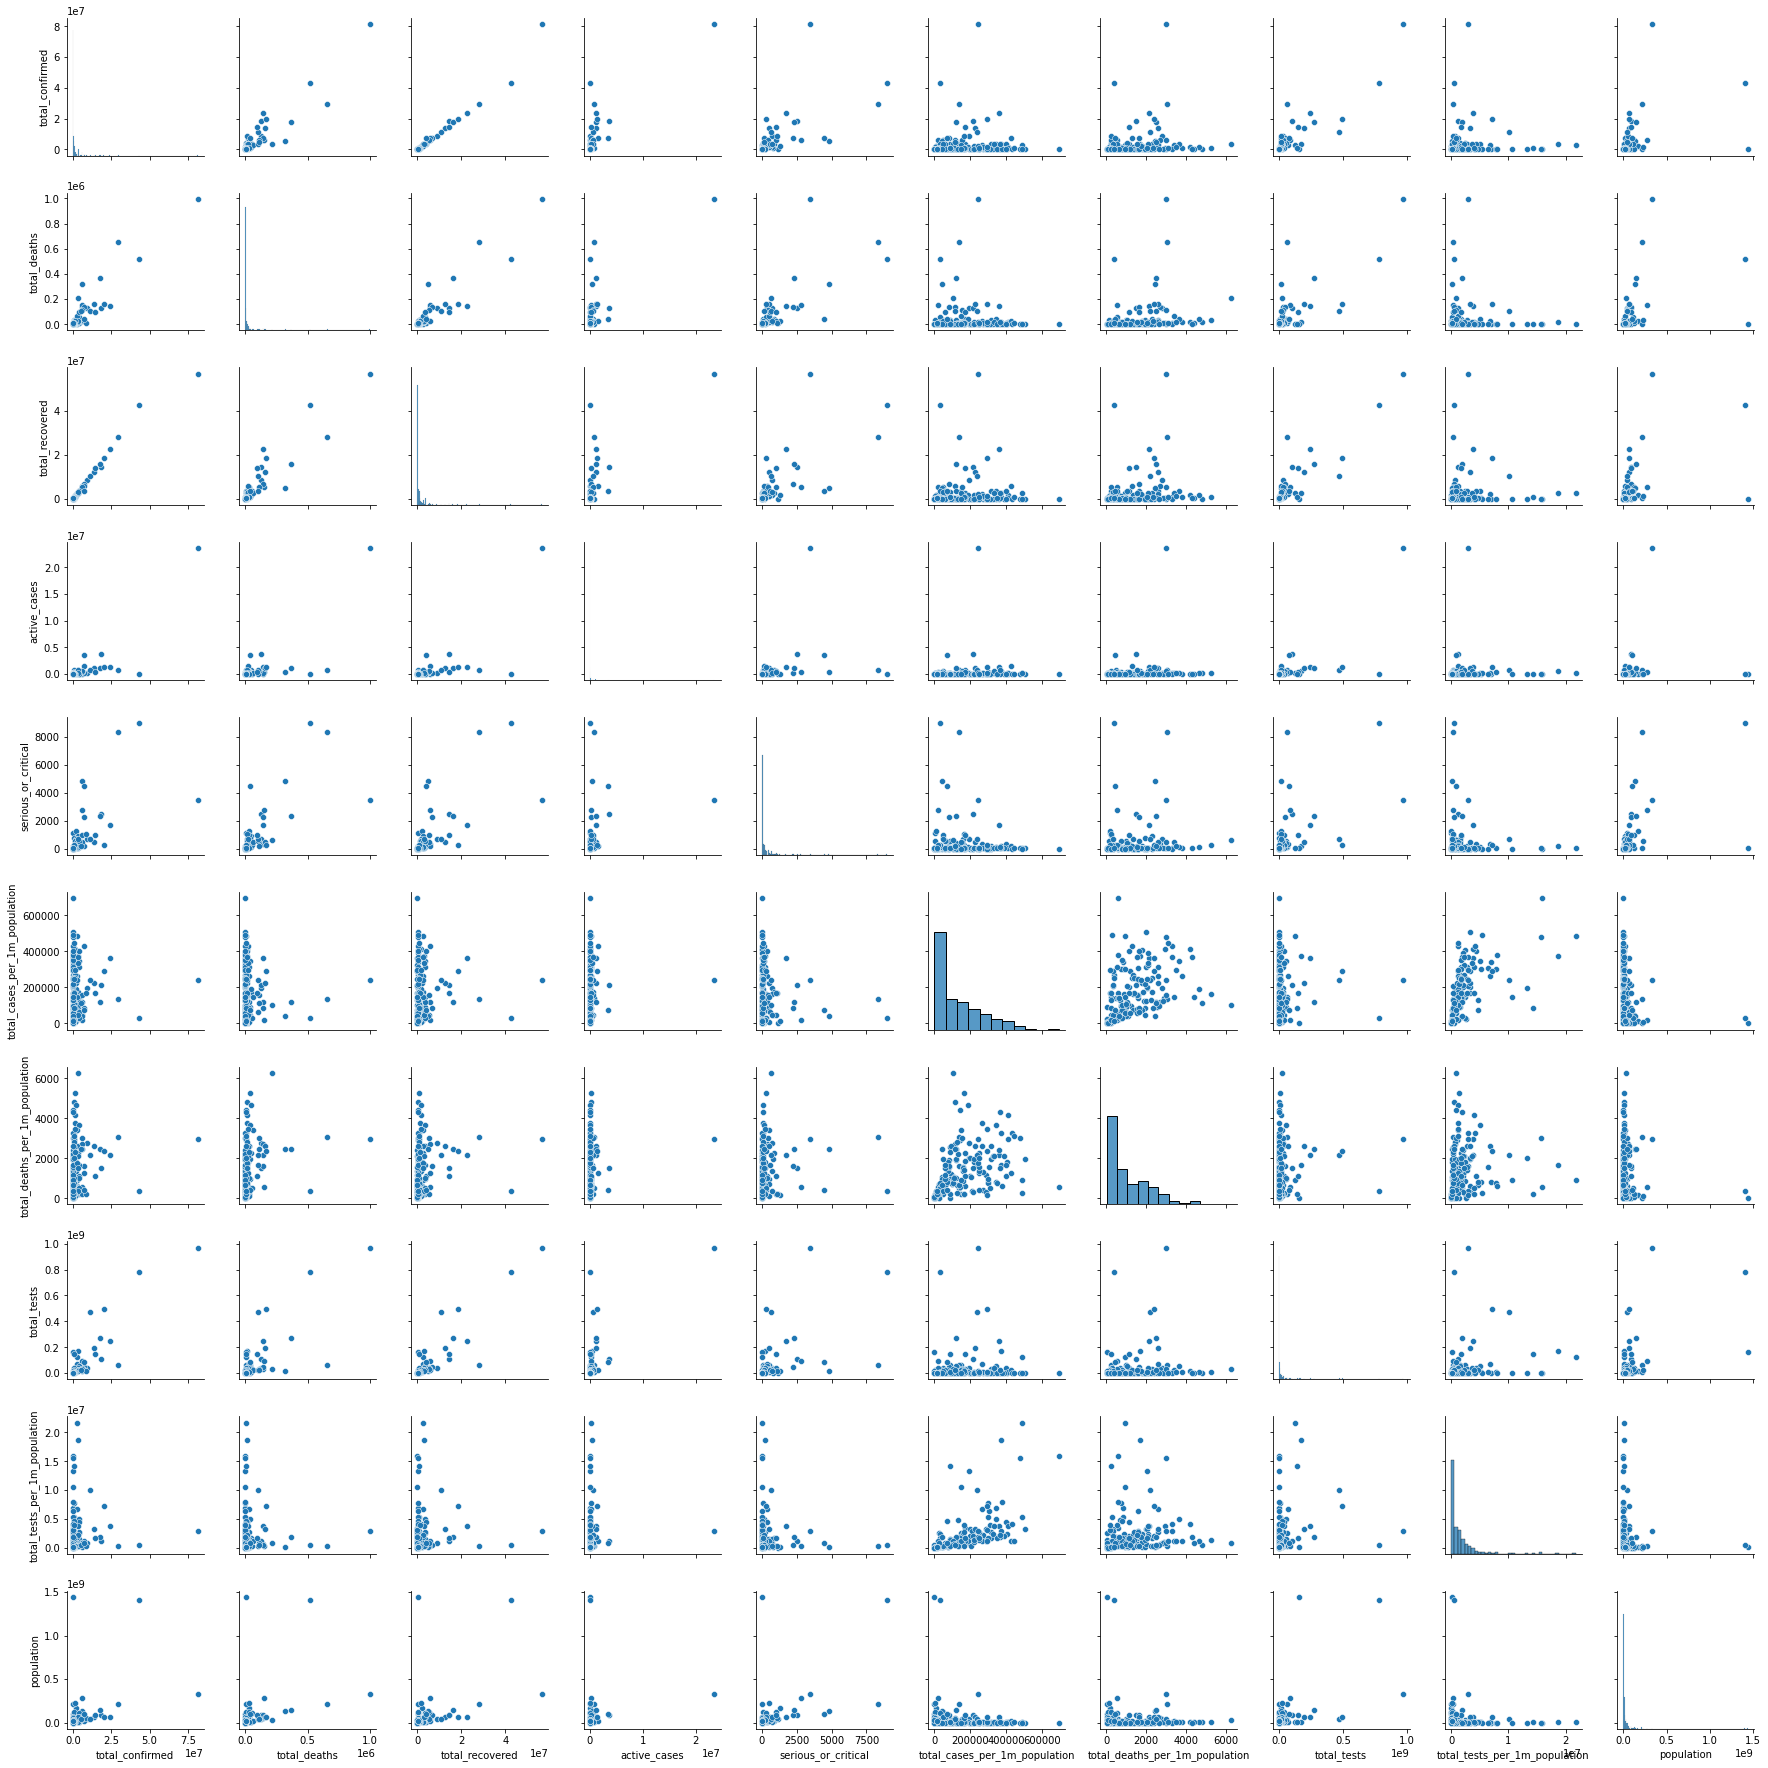

In [17]:
# plotting scatter plolts of all data using pairplot
sns.pairplot(data=df)

In [18]:
#storing total cases in cases_df
cases_df = df.sum()

In [19]:
cases_df

country                           AfghanistanAlbaniaAlgeriaAndorraAngolaAnguilla...
continent                         AsiaEuropeAfricaEuropeAfricaNorth AmericaNorth...
total_confirmed                                                           466637291
total_deaths                                                              6088834.0
total_recovered                                                         390943167.0
active_cases                                                             49462080.0
serious_or_critical                                                         63207.0
total_cases_per_1m_population                                              29154096
total_deaths_per_1m_population                                             242455.0
total_tests                                                            5984595324.0
total_tests_per_1m_population                                           380851523.0
population                                                               788

In [20]:
##dropping categorical columns

cases_df.drop(['country','continent'],inplace=True)

In [21]:
cases_df

total_confirmed                      466637291
total_deaths                         6088834.0
total_recovered                    390943167.0
active_cases                        49462080.0
serious_or_critical                    63207.0
total_cases_per_1m_population         29154096
total_deaths_per_1m_population        242455.0
total_tests                       5984595324.0
total_tests_per_1m_population      380851523.0
population                          7887990524
dtype: object

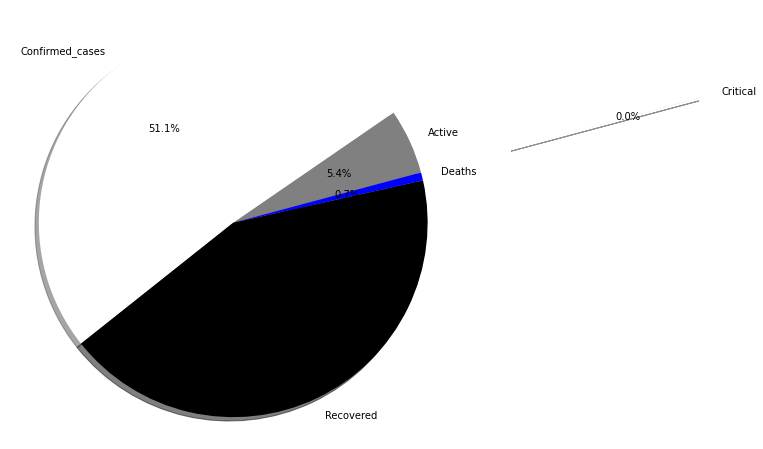

In [22]:
# Pie chart Visualization
data =[49462080,466637291,390943167,6088834,63207]
label = 'Active','Confirmed_cases', 'Recovered','Deaths','Critical'
explode = (0,0,0,0,1.5)
colors = ['gray', 'white','black', 'blue', 'grey']
fig1, ax1 = plt.subplots(figsize=(13, 8))
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=15, shadow= True, colors=colors,explode=explode)
plt.axis('equal')
plt.show()


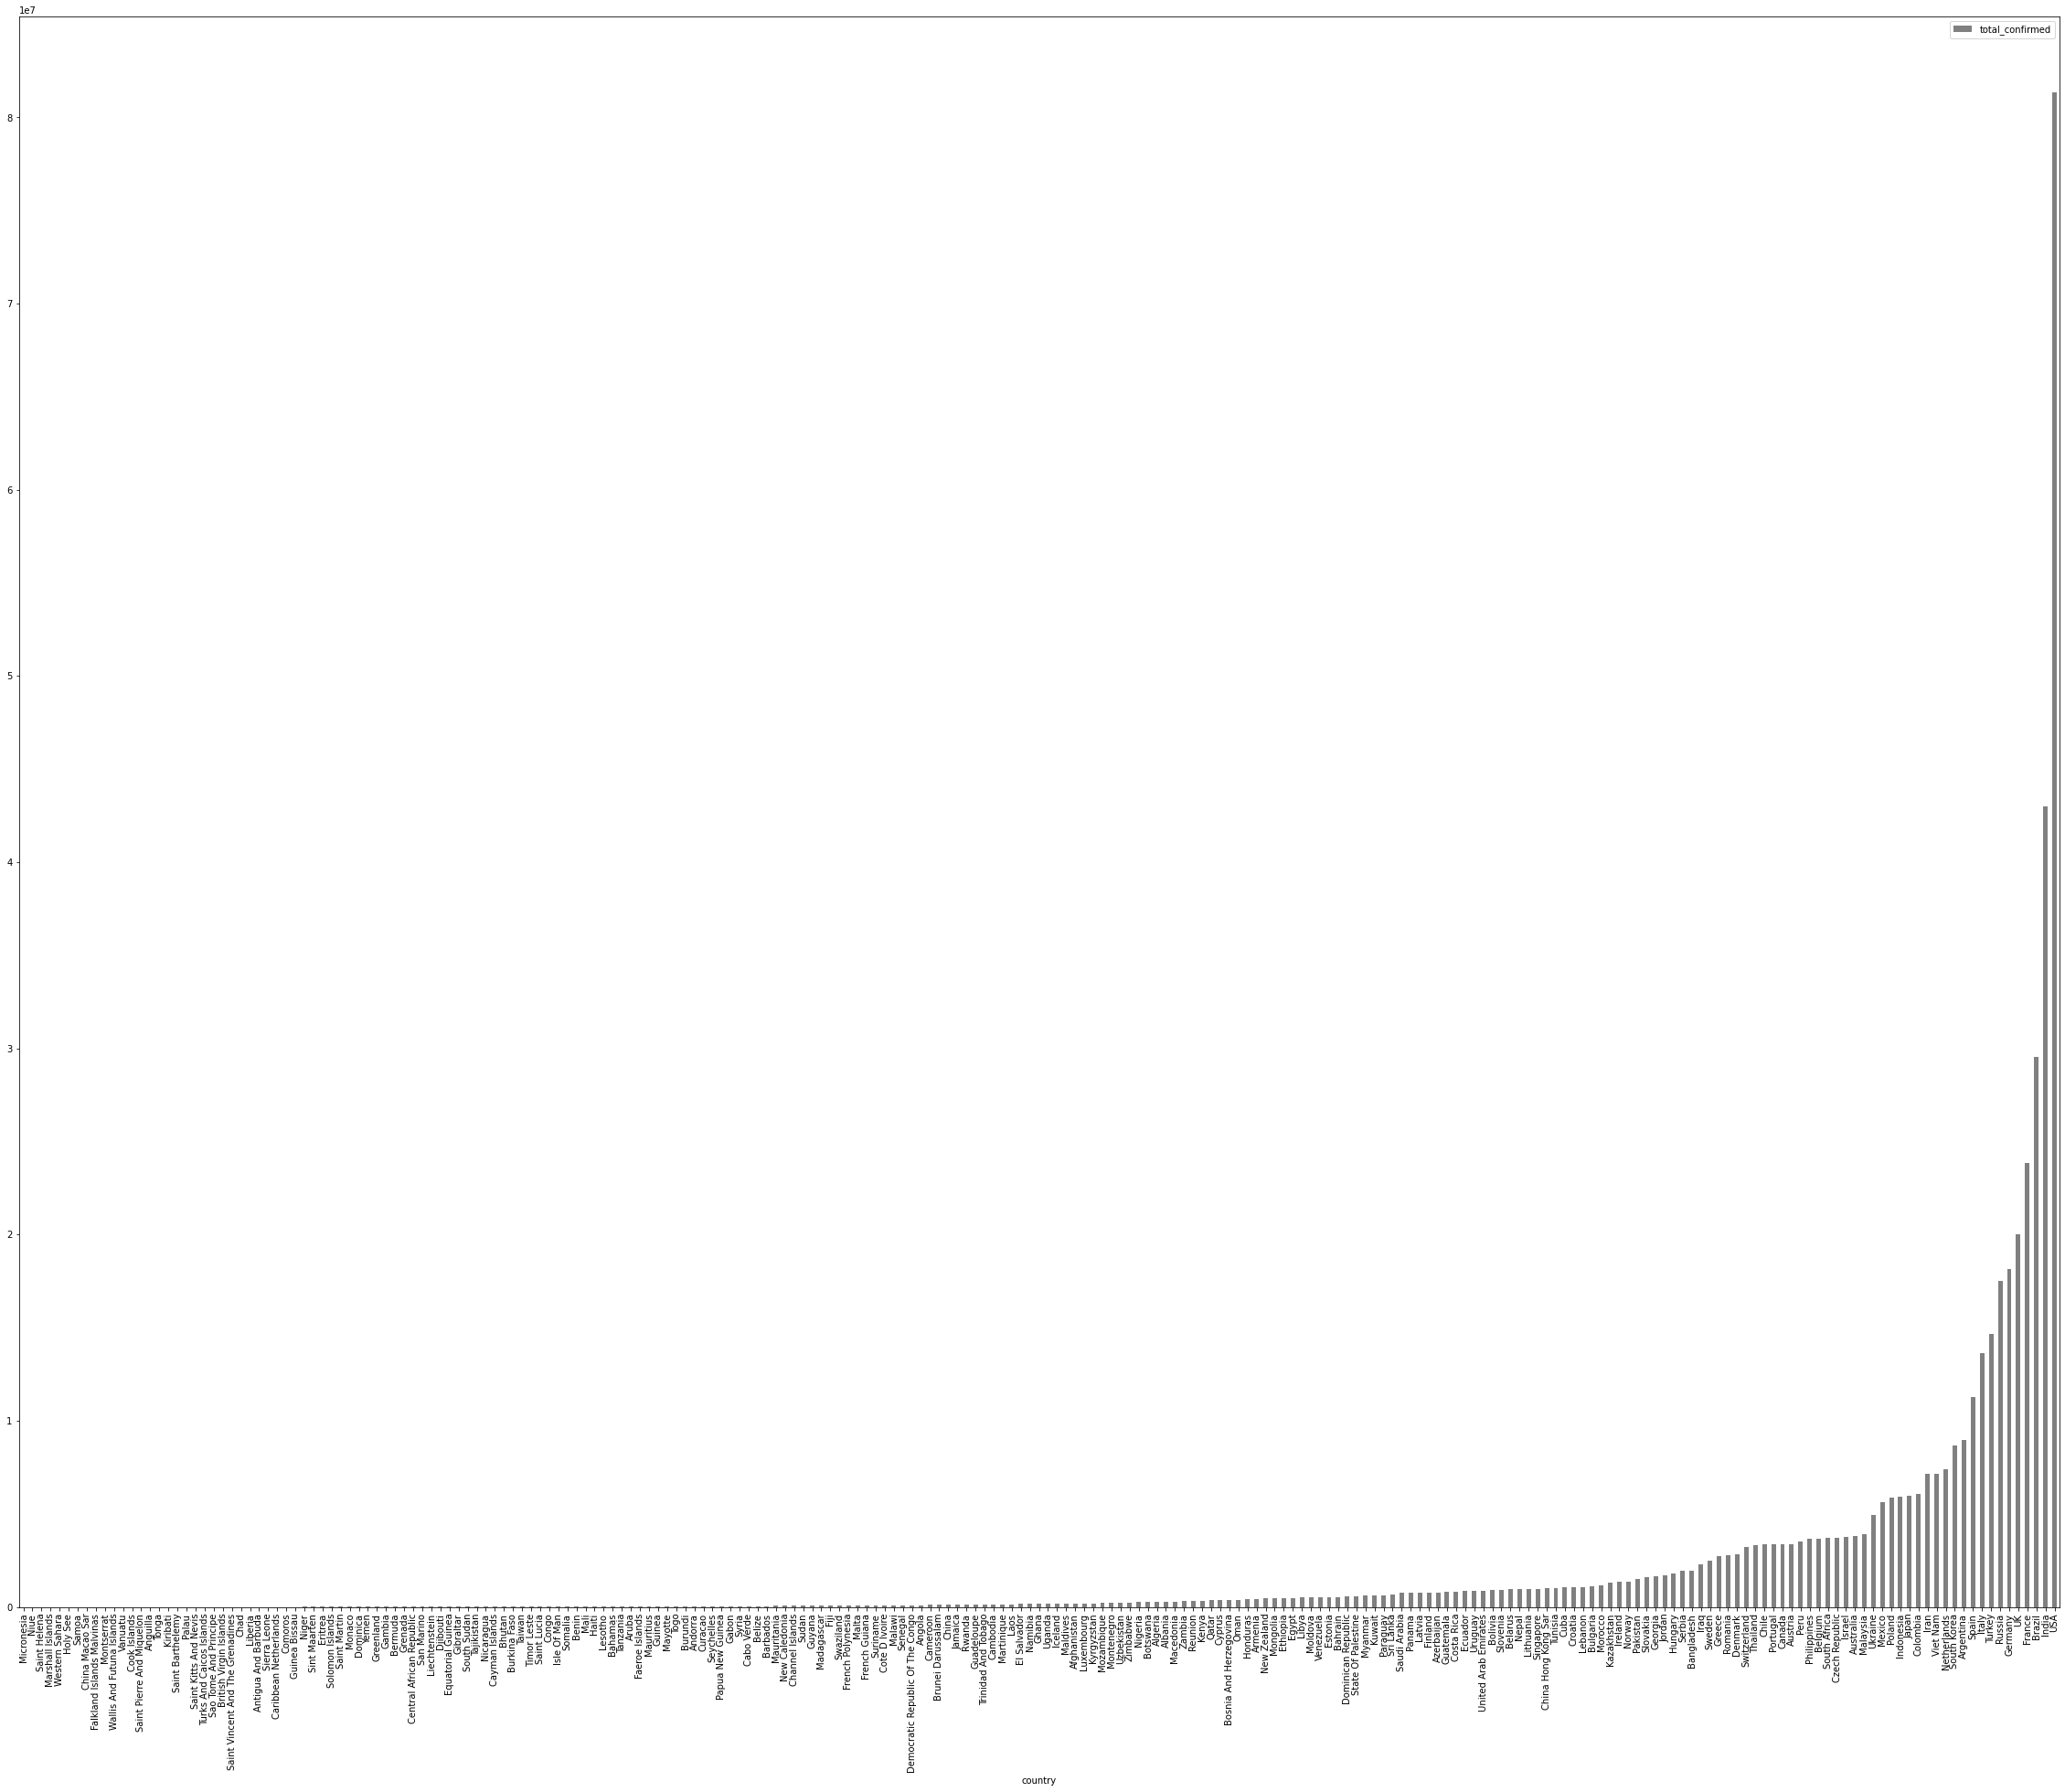

In [23]:
from numpy.core.fromnumeric import size
from IPython.core.pylabtools import figsize
## sort values in an ascending order
# below we get a picture of countries in an ascending order based on confrimed cases.
plt.rcParams['figure.figsize'] = [40, 32]
df[['country','total_confirmed']].groupby(["country"]).mean().sort_values(by='total_confirmed').plot.bar(color='grey')


TOP 5 countries with most confirmed cases

* USA

* india

* Brazil

* France

* UK

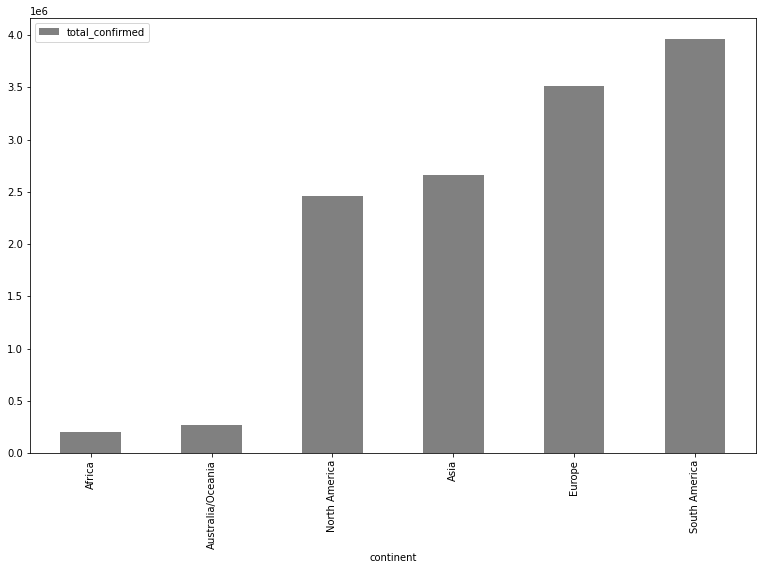

In [24]:
##total confrimed cases in ascending order by continents
plt.rcParams['figure.figsize'] = [13, 8]
df[['continent','total_confirmed']].groupby(["continent"]).mean().sort_values(by='total_confirmed').plot.bar(color='grey')

South america with the most confirmed cases with africa wit the least

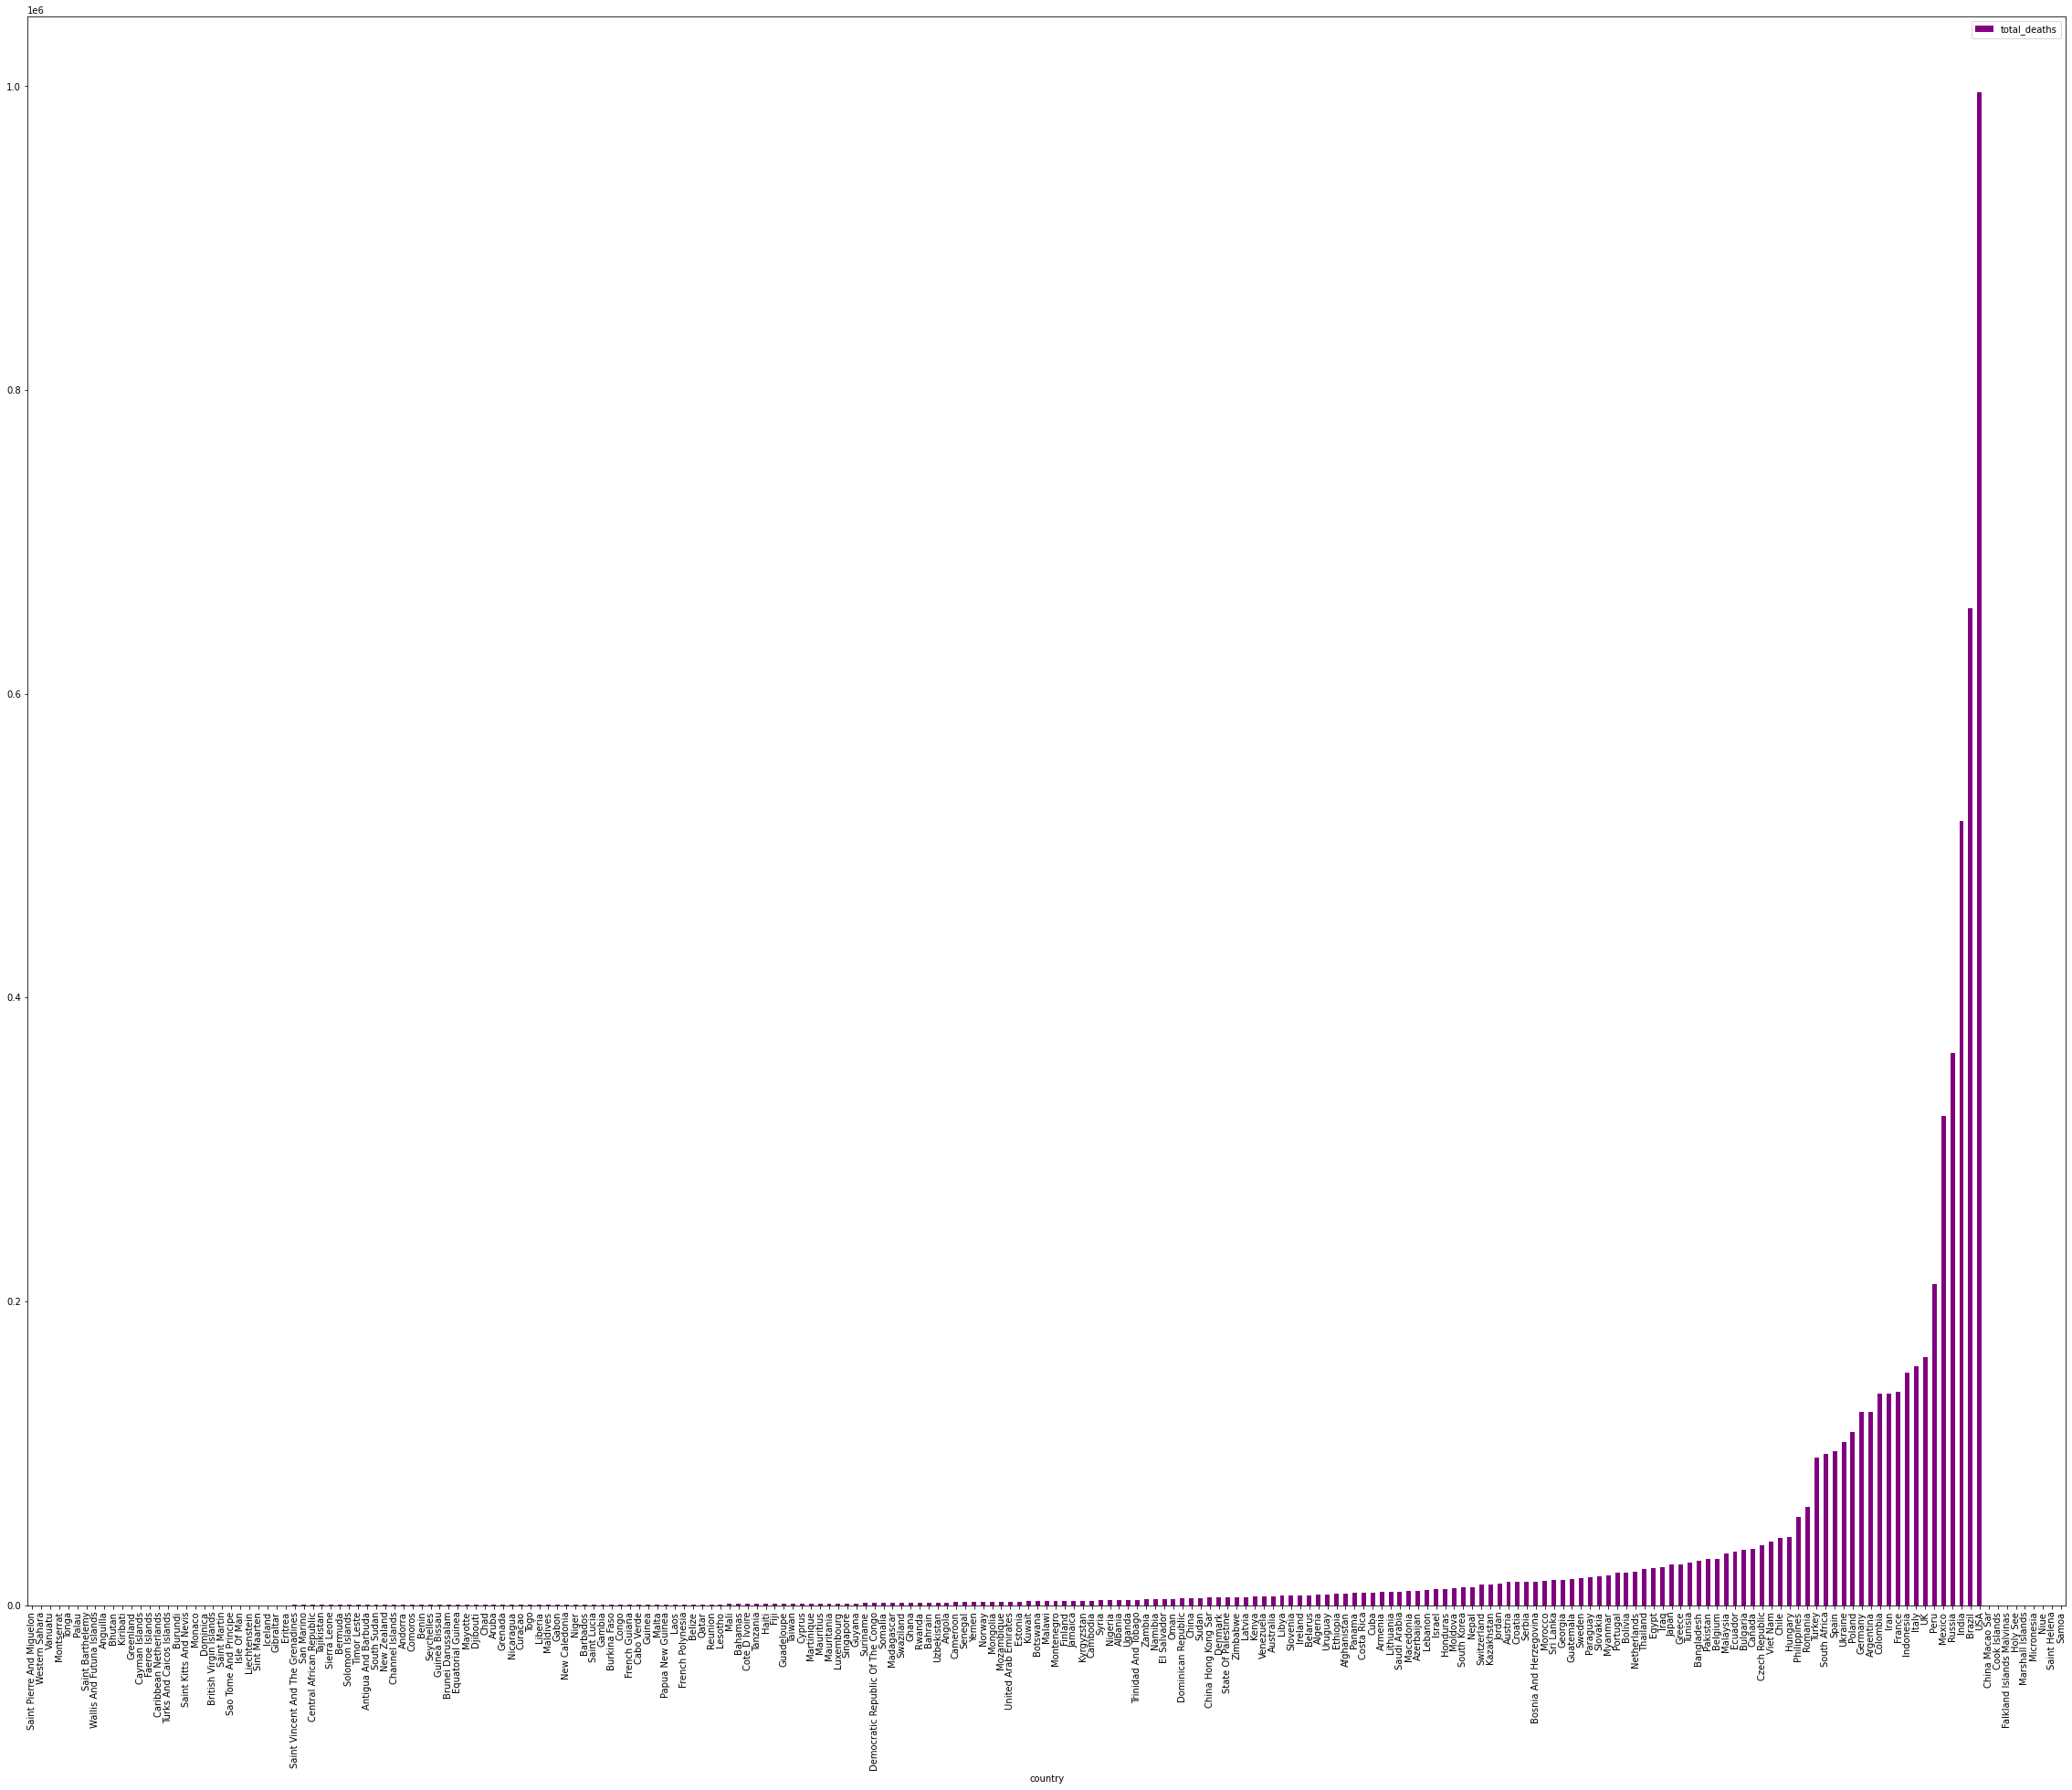

In [25]:

# below we get a picture of countries in an ascending order based on total deaths
plt.rcParams['figure.figsize'] = [40, 32]
df[['country','total_deaths']].groupby(["country"]).mean().sort_values(by='total_deaths').plot.bar(color='purple')
plt.show()

TOP 5 countries with most deaths

* USA

* Brazil

* India

* Russia

* Mexico

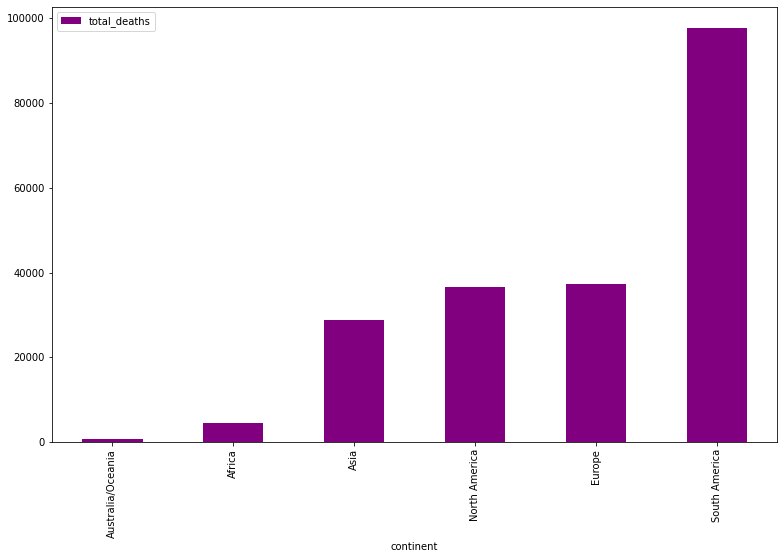

In [26]:
# grouping in ascending order continents with most deaths
plt.rcParams['figure.figsize'] = [13, 8]
df[['continent','total_deaths']].groupby(["continent"]).mean().sort_values(by='total_deaths').plot.bar(color='purple')
plt.show()

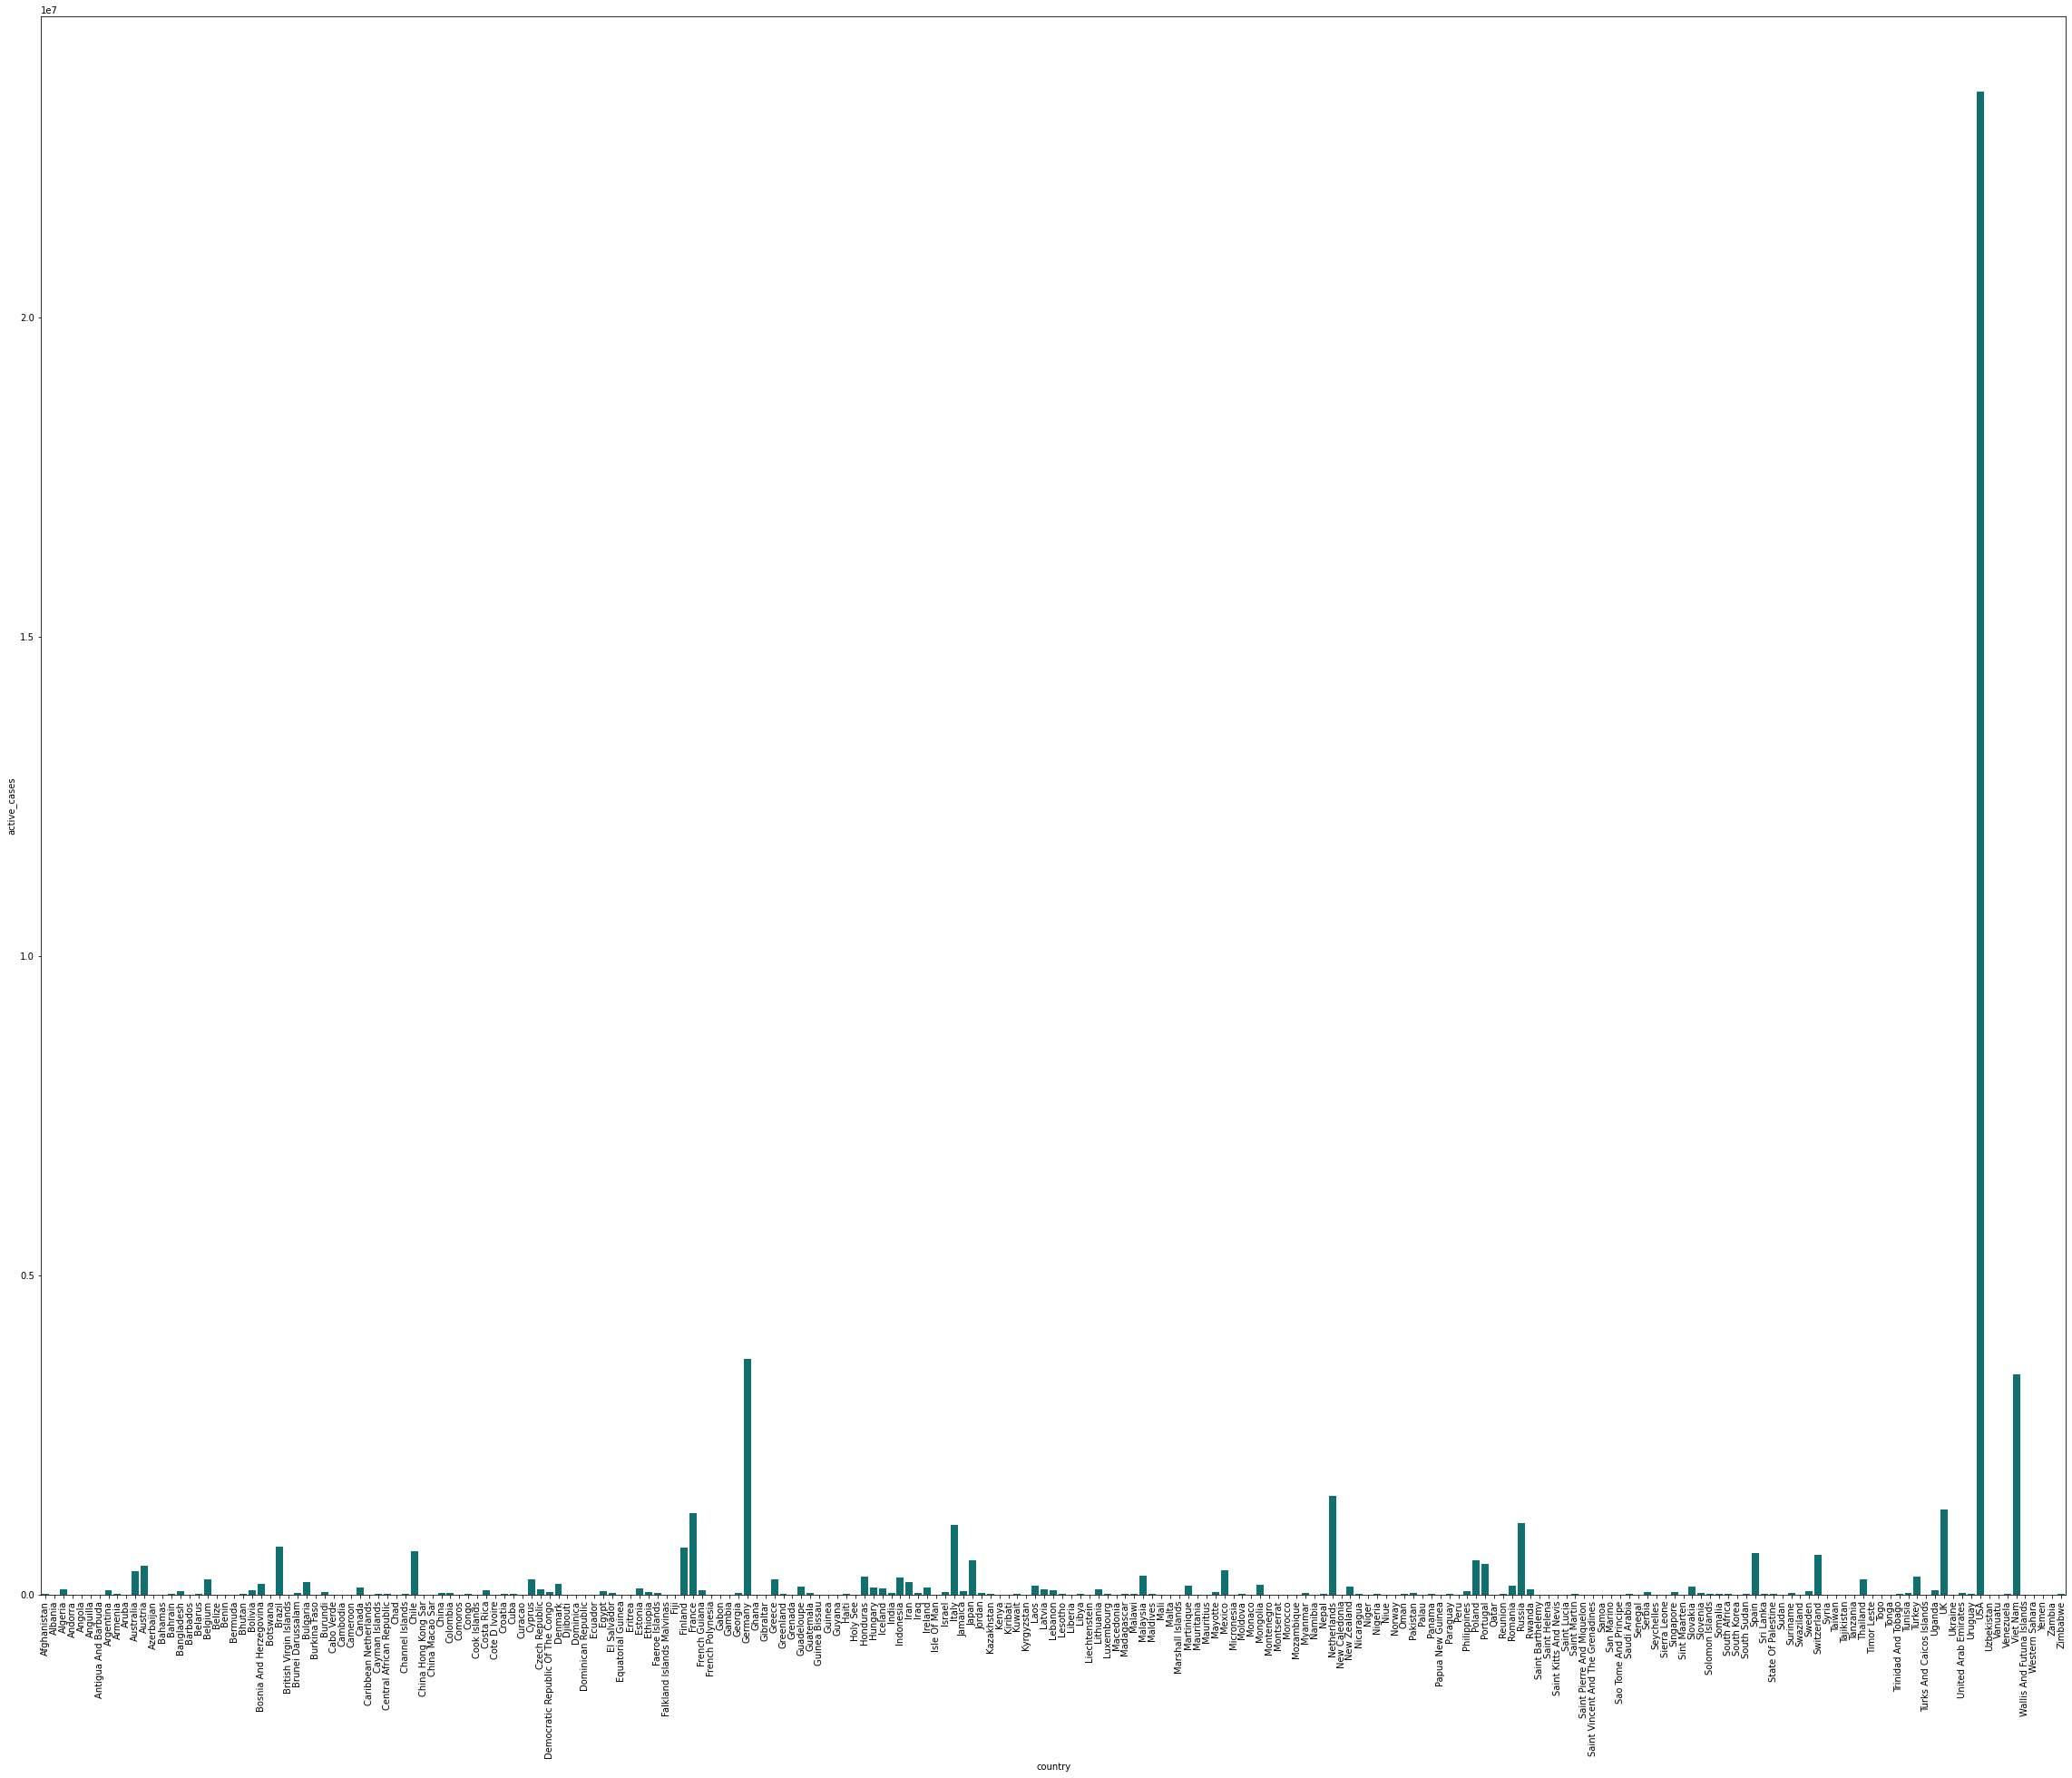

In [27]:
plt.figure(figsize=(40, 32))
plt.xticks(rotation=90)
sns.barplot(x='country',y='active_cases',color='teal',data=df);
# The visualization below shows us the number of active cases

TOP 4 countries with active cases

* USA

* Germany

* vietnam

* Netherlands

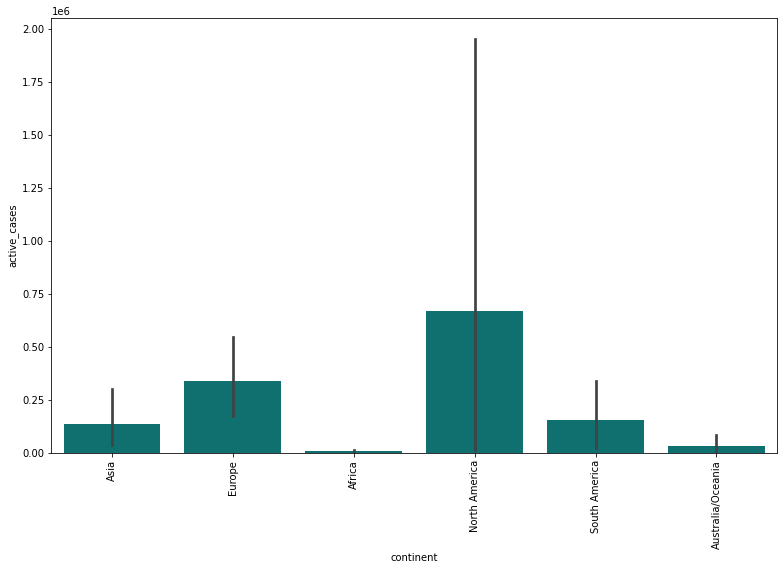

In [28]:
plt.figure(figsize=(13, 8))
plt.xticks(rotation=90)
sns.barplot(x='continent',y='active_cases',color='teal',data=df);

## north america still with the most active cases

In [29]:
df= df.set_index('country')

# setting index as country name

In [30]:
df.head(7)

,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
country,,,,,,,,,,,
Afghanistan,Asia,176983,7651.0,159744.0,9588.0,1124.0,4378,189.0,909906.0,22511.0,40421365
Albania,Europe,272885,3487.0,268764.0,634.0,13.0,95001,1214.0,1762808.0,613697.0,2872441
Algeria,Africa,265511,6870.0,178137.0,80504.0,8.0,5874,152.0,230861.0,5108.0,45199871
Andorra,Europe,39234,153.0,38377.0,704.0,14.0,506402,1975.0,249838.0,3224715.0,77476
Angola,Africa,99003,1900.0,96951.0,152.0,NaN,2861,55.0,1473371.0,42575.0,34606502
Anguilla,North America,2595,9.0,2572.0,14.0,4.0,170376,591.0,51382.0,3373515.0,15231
Antigua And Barbuda,North America,7470,135.0,7330.0,5.0,1.0,75218,1359.0,18901.0,190321.0,99311


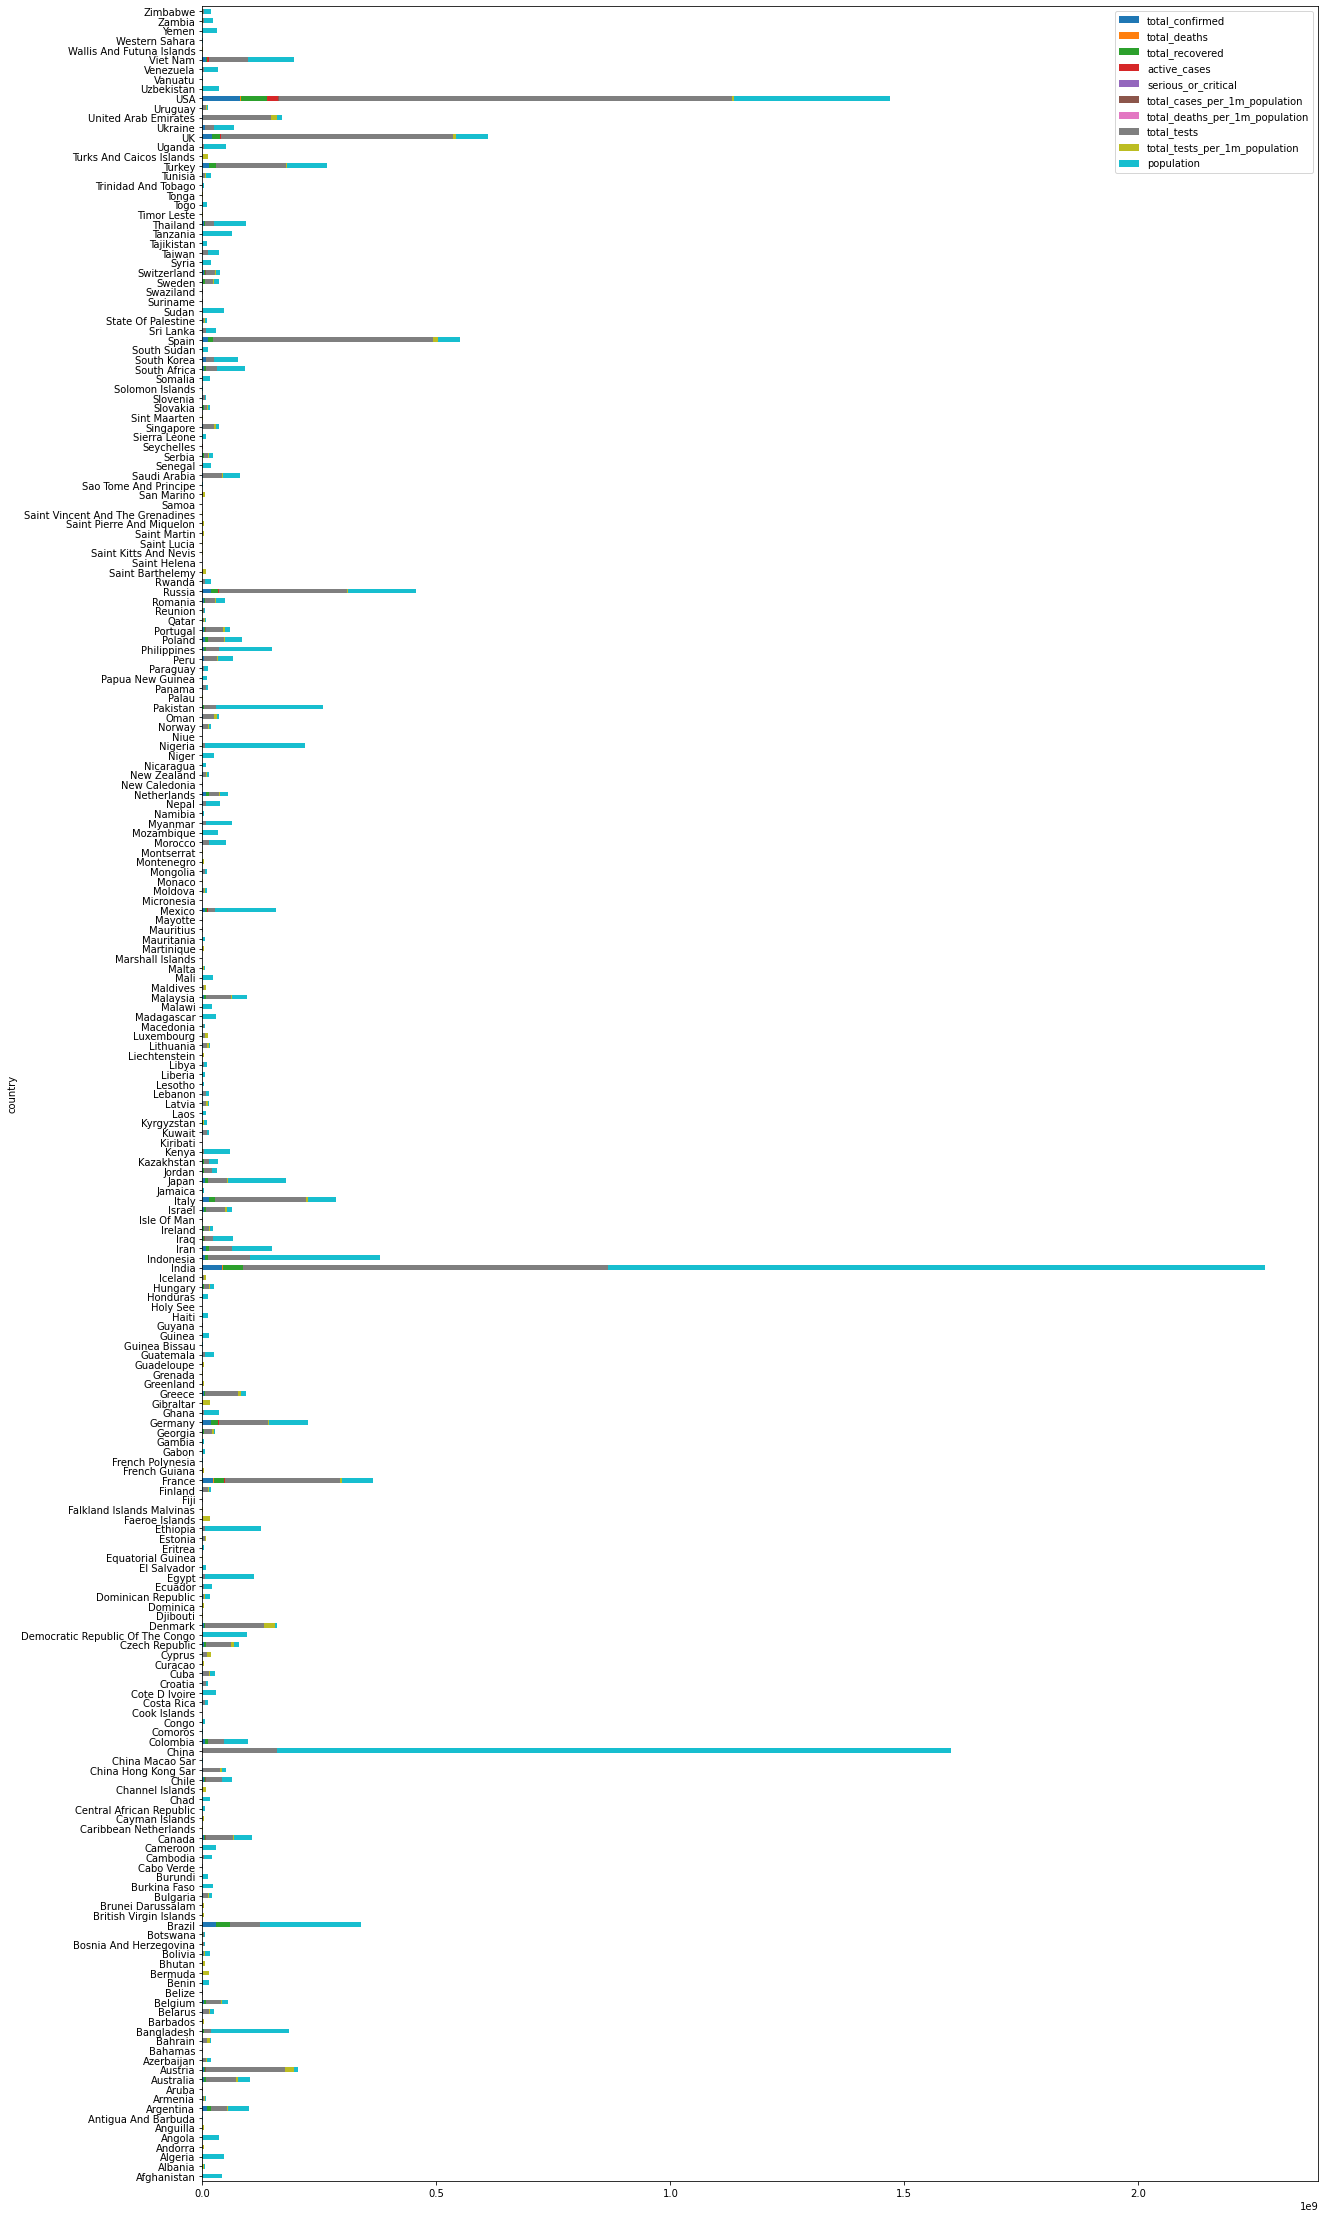

In [31]:
df.plot.barh(stacked=True,figsize=(20,40))
# Stacked bar plot

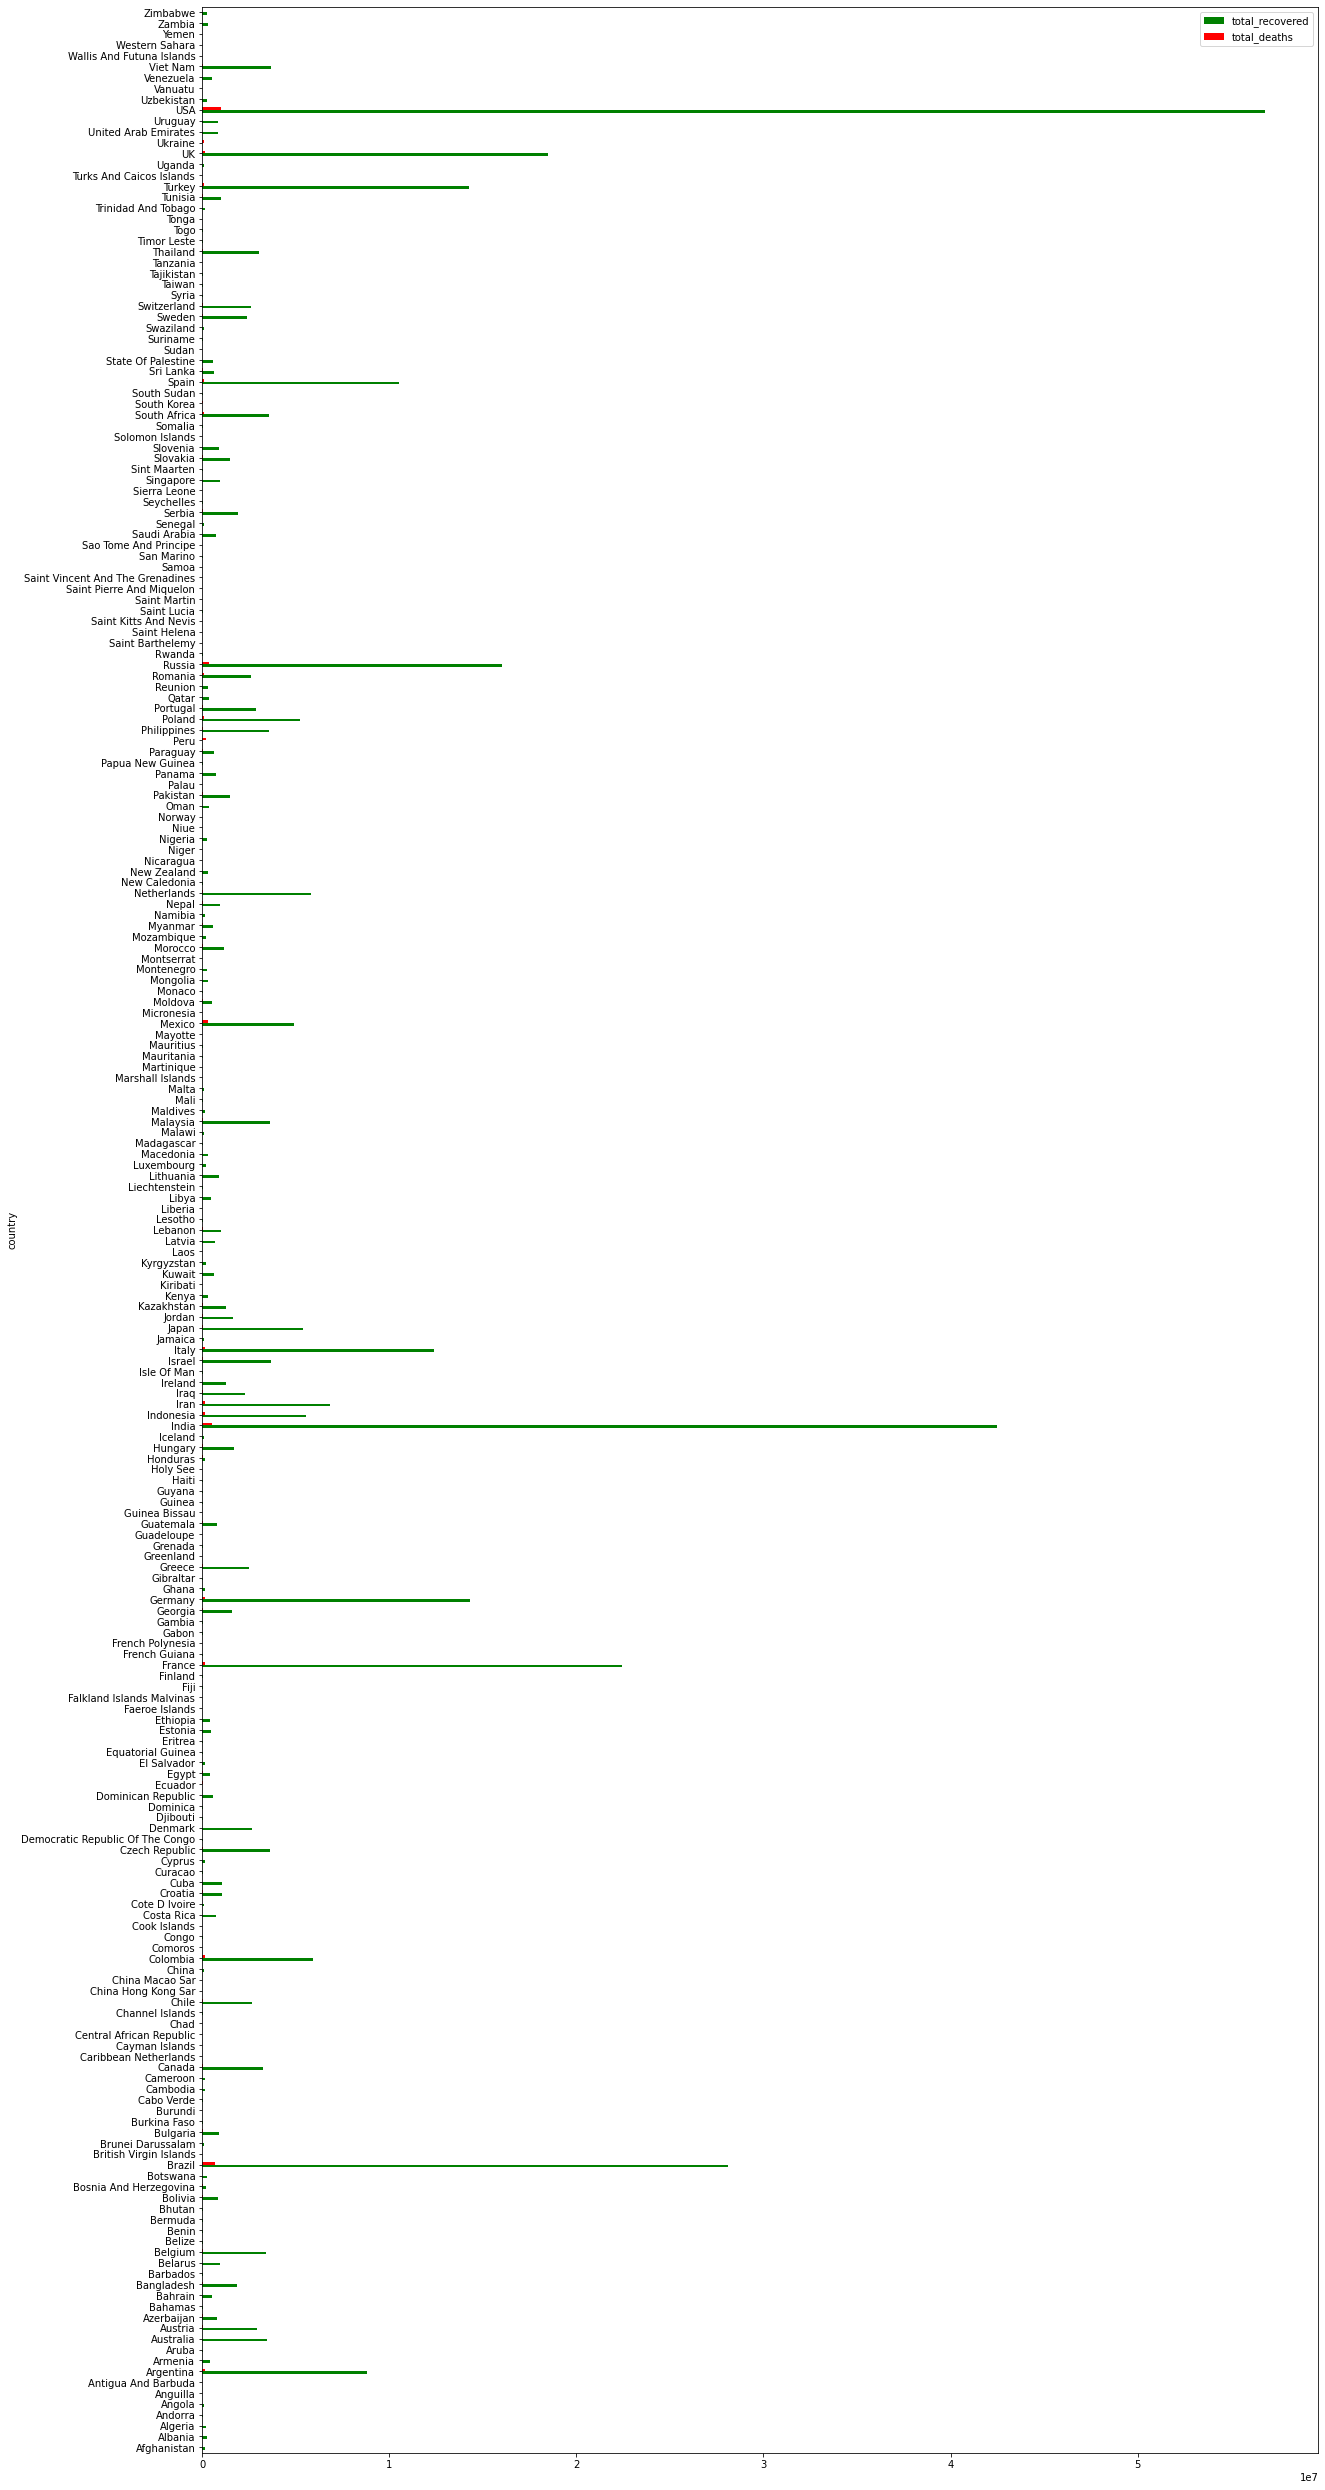

In [32]:
df1=df[['total_recovered', 'total_deaths']] 
df1.plot.barh(color={"total_recovered": "green", "total_deaths": "red"},figsize=(20,45))
#plot of recovered and deaths

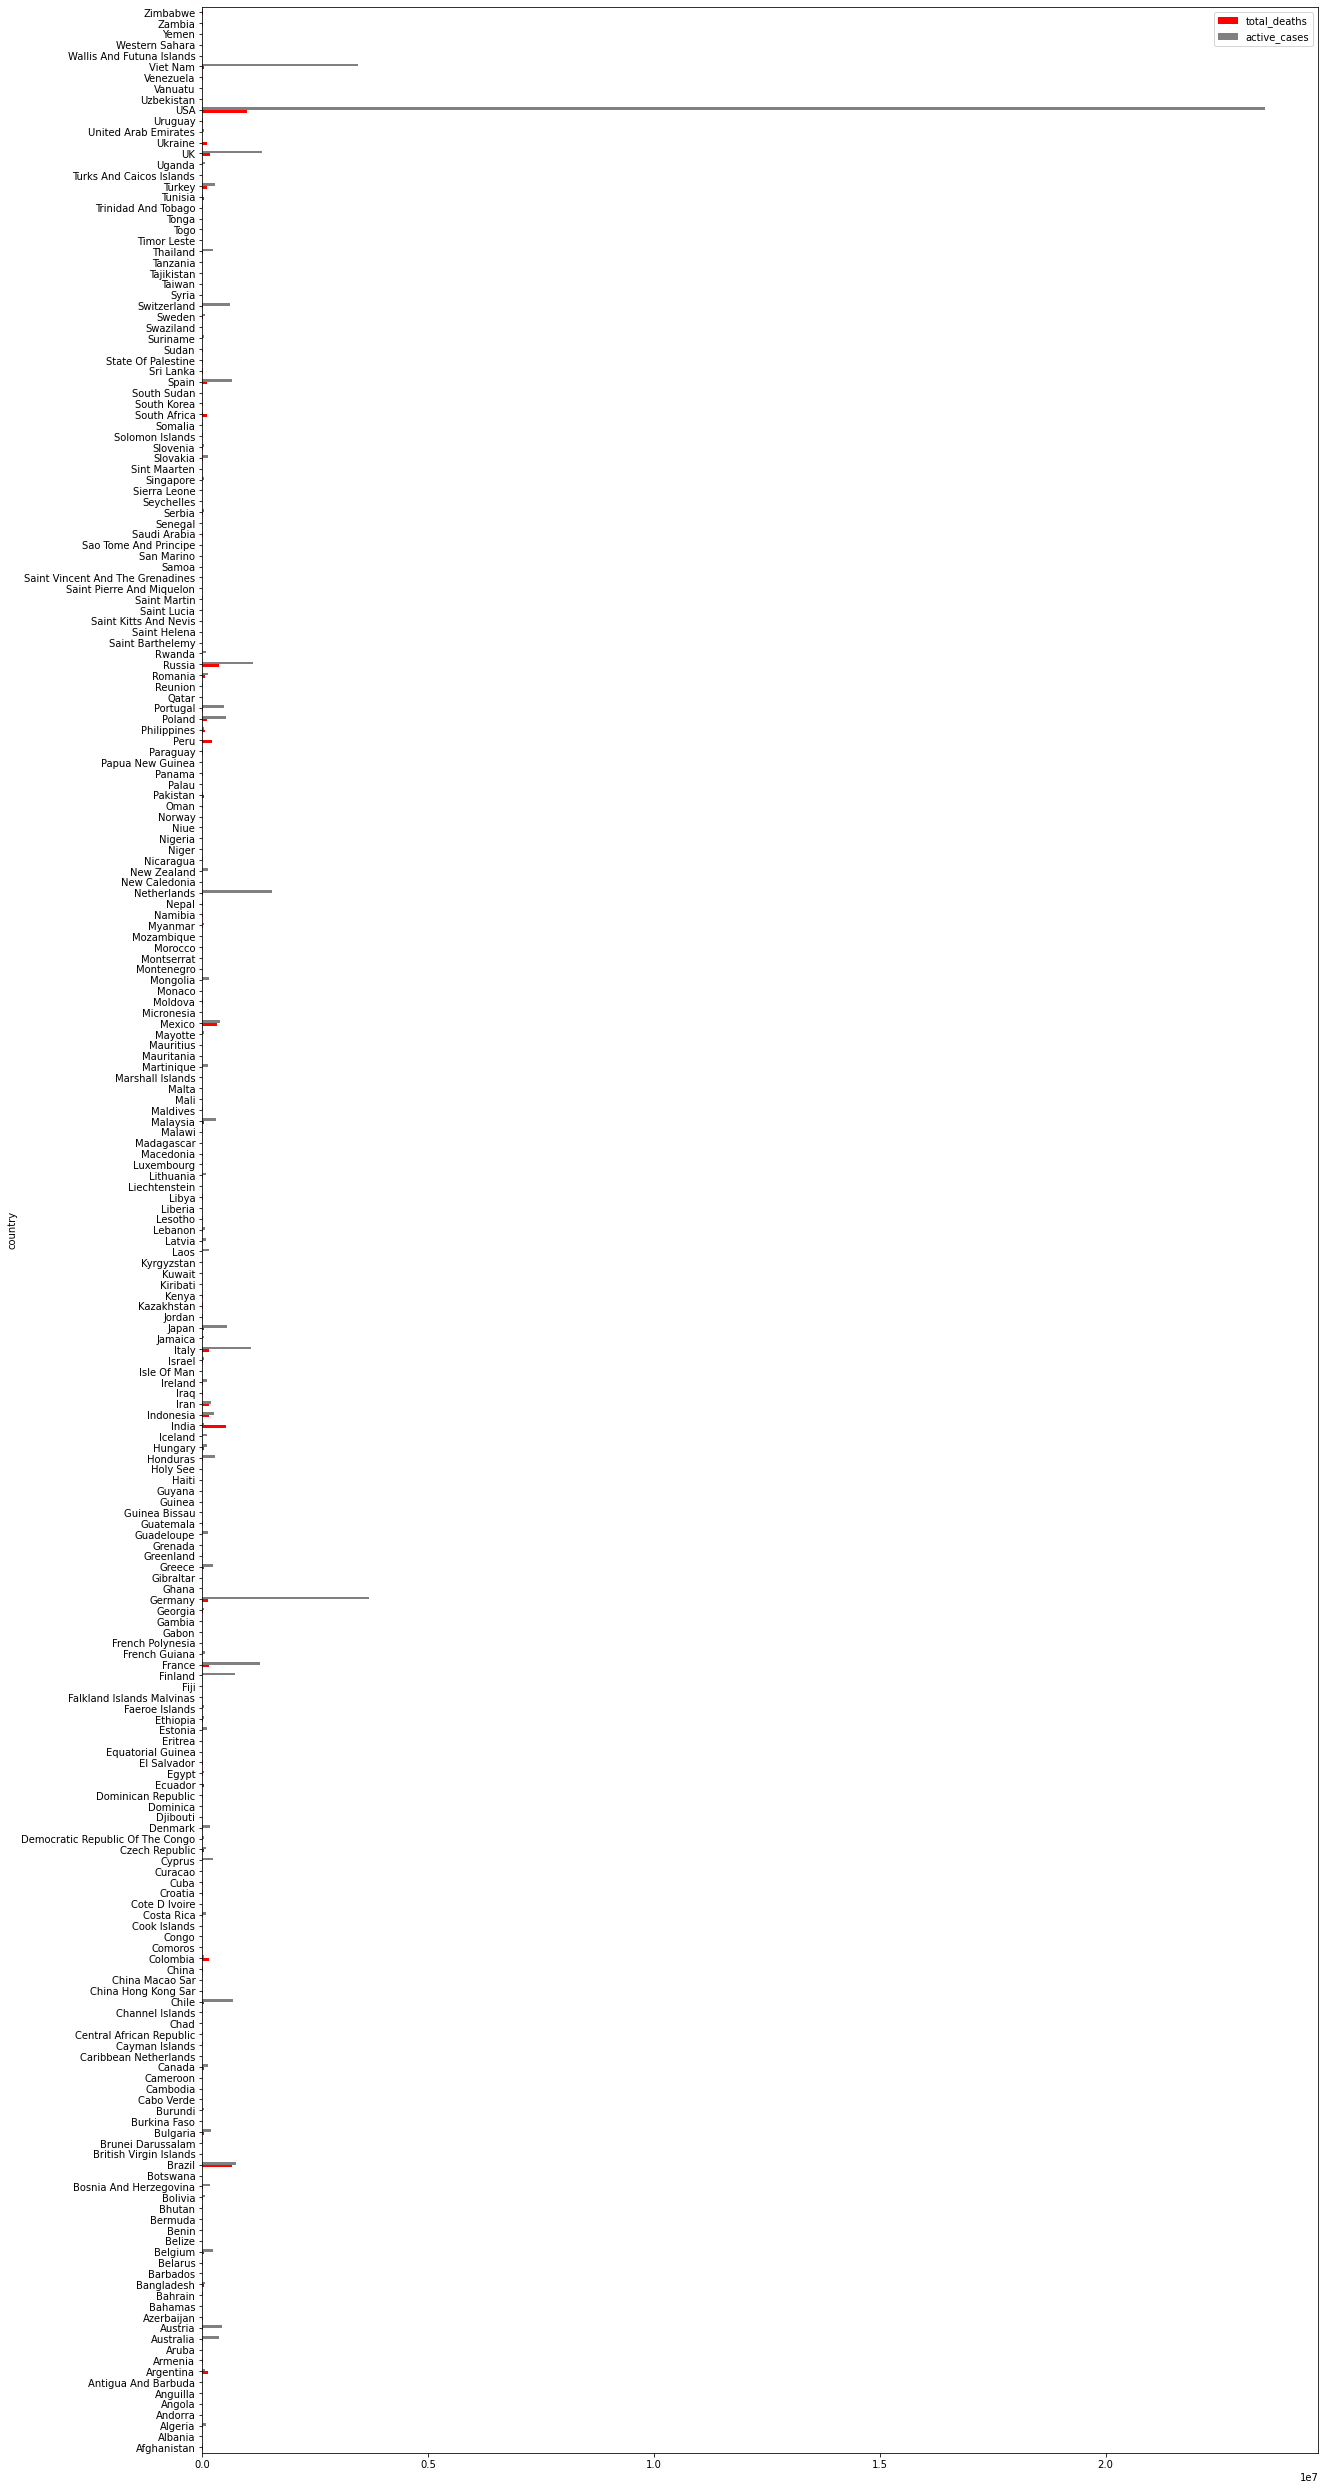

In [36]:
df2=df[['total_deaths', 'active_cases']] 
df2.plot.barh(color={"total_deaths": "red", "active_cases": "grey"},figsize=(20,45))
# barplot for death cases and active cases